In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
FILE_NAME = 'measures_bm25_01_0.15_ShuffTrue_StratTrue_WeighFalse_NoStopTrue_StemFalse_LowFalse_NoPunTrue_Nbest3'
PATH_METRICS = '../results/%s.csv' % FILE_NAME
PATH_ACCURACIES = f'../results/{FILE_NAME}_accuracies.png'
PATH_F1SCORES = f'../results/{FILE_NAME}_f1scores.png'
SKIP_LAST_ROW = True # skip if last row contains the calculated averages

In [69]:
metrics = pd.read_csv(PATH_METRICS, sep='\t')

if SKIP_LAST_ROW:
    metrics = metrics[:-1]

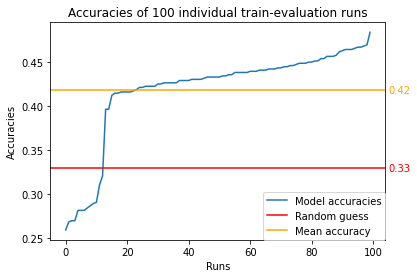

In [70]:
accuracies = metrics['accuracy']
total = len(accuracies)
mean = sum(accuracies)/total

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sorted(accuracies), label='Model accuracies')
plt.axhline(y=0.33, color='r', linestyle='-', label='Random guess')
ax.text(1.01, 0.33, "{:.2f}".format(0.33), color='red', ha="left", va="center",
        transform=ax.get_yaxis_transform())
plt.axhline(y=mean, color='orange', linestyle='-', label='Mean accuracy')
ax.text(1.01, mean, "{:.2f}".format(mean), color='orange', ha="left", va="center",
        transform=ax.get_yaxis_transform())
plt.xlabel("Runs")
plt.ylabel('Accuracies')
plt.title(f"Accuracies of {total} individual train-evaluation runs")
plt.legend(loc="lower right", borderaxespad=0)
plt.savefig(PATH_ACCURACIES)
plt.show()


In [71]:
# calculate the theoretical f1-score if we were to random guess the labels
total_support = metrics['macro avg.support'].mean()
supports = [metrics['0.support'].mean(), metrics['1.support'].mean(), metrics['2.support'].mean()]
n_class = len(supports)
f1_class = [None] * n_class
for i in range(n_class):
    f1_class[i] = 2 * (supports[i]/(n_class * total_support)) / \
                  (supports[i]/total_support + 1/n_class)
f1_macro_avg = sum(f1_class) / n_class

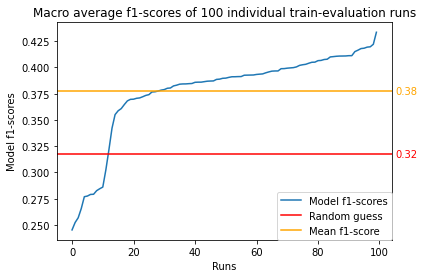

In [72]:
f1scores = metrics['macro avg.f1-score']
total = len(f1scores)
meanf1 = sum(f1scores)/total
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sorted(f1scores), label='Model f1-scores')
plt.axhline(y=f1_macro_avg, color='r', linestyle='-', label='Random guess')
ax.text(1.01, f1_macro_avg, "{:.2f}".format(f1_macro_avg), color='red', ha="left", va="center",
        transform=ax.get_yaxis_transform())
plt.axhline(y=meanf1, color='orange', linestyle='-', label='Mean f1-score')
ax.text(1.01, meanf1, "{:.2f}".format(meanf1), color='orange', ha="left", va="center",
        transform=ax.get_yaxis_transform())
plt.xlabel("Runs")
plt.ylabel('Model f1-scores')
plt.title(f"Macro average f1-scores of {total} individual train-evaluation runs")
plt.legend(loc="lower right", borderaxespad=0)
plt.savefig(PATH_F1SCORES)
plt.show()